In [11]:
import pandas as pd
import numpy as np
%matplotlib inline
#%pylab inline
import pylab
from scipy.spatial.distance import cdist
matplotlib.rc('image', cmap = 'gray')
from collections import Counter
import random as pyrandom

In [2]:
%pylab inline?

Object `inline` not found.


In [10]:
data = r_[10*randn(1000,2)+array([70,30]),
          10*randn(1000,2)+array([10,10]),
          10*randn(1000,2)+array([50,80])]

In [15]:
data= data[pyrandom.sample(range(len(data)),len(data))]

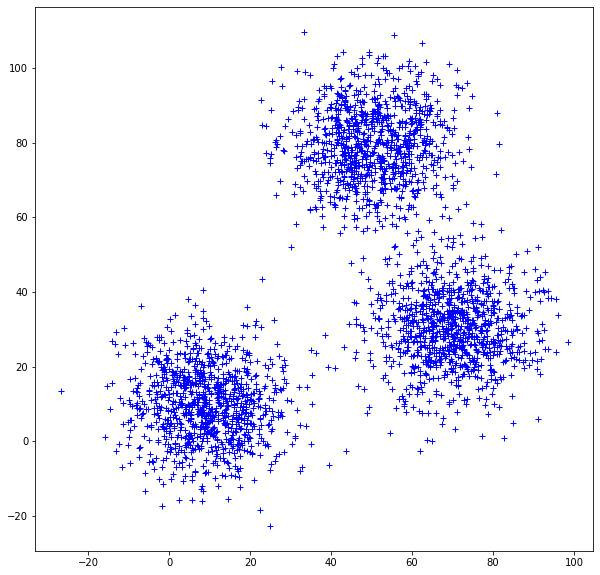

In [20]:
figsize(10,10)
plot(data[:,0], data[:,1], 'b+')
plt.show()

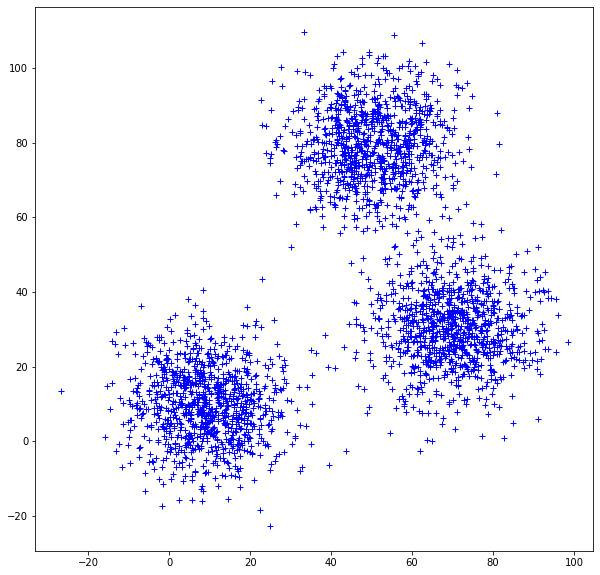

In [25]:
protos = array([[30,30],[40,20],[0,90],[50,50]])
start = protos.copy()
figsize(10,10)
plot(data[:,0], data[:,1], 'b+')

In [5]:
import pandas as pd
import numpy as np
#import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
%matplotlib inline
import pylab
import random as pyrandom
from scipy.spatial.distance import cdist
matplotlib.rc('image', cmap = 'gray')
from collections import Counter
#%pylab inline

In [16]:
data = r_[10*randn(1000,2)+array([70,30]),
          10*randn(1000,2)+array([10,10]),
          10*randn(1000,2)+array([50,80])]
data = data[pyrandom.sample(range(len(data)),len(data))]

In [9]:
data = pyrandom.sample(range(len(data)), len(data))

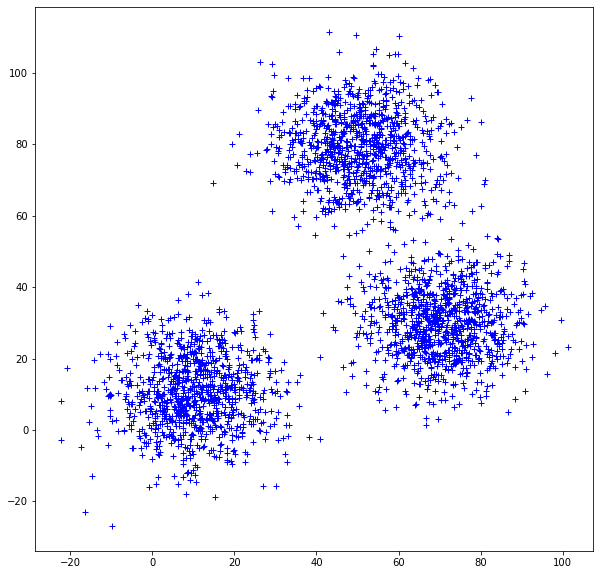

In [17]:
figsize(10,10)
plot(data[:,0],data[:,1],'b+')

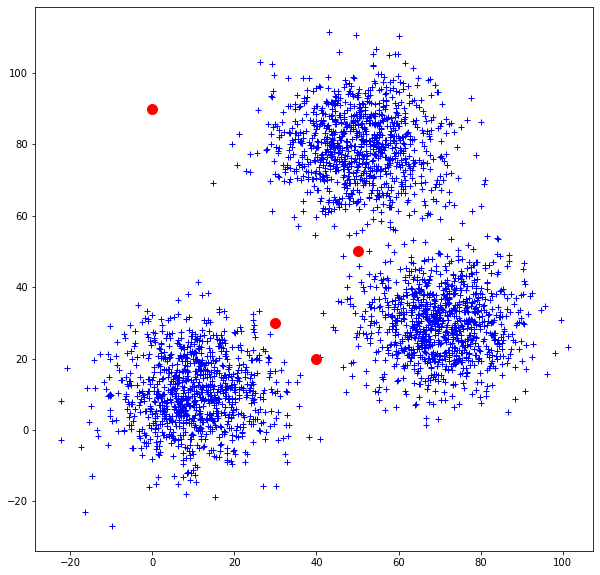

In [23]:
protos = array([[30,30],[40,20],[0,90],[50,50]])
start = protos.copy()

figsize(10,10)
plot(data[:,0], data[:,1], 'b+')
plot(protos[:,0], protos[:,1], 'ro', markersize = 10)

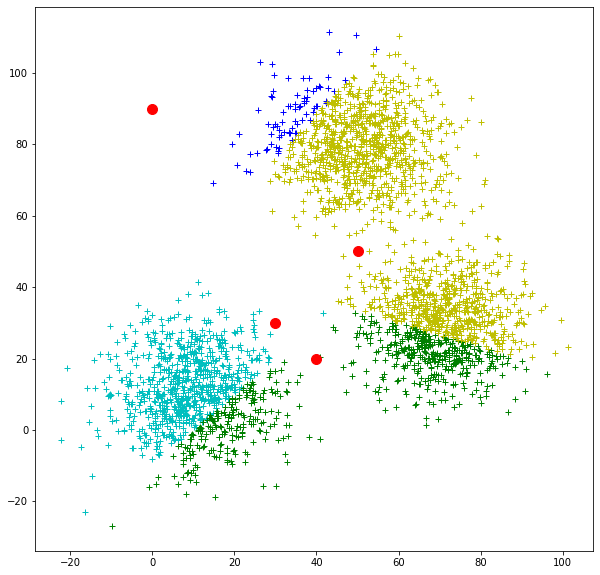

In [25]:
figsize(10,10)
dists = cdist(protos,data)
closest = argmin(dists,axis=0)
for i in range(len(protos)):
    plot(data[closest==i,0], data[closest==i,1],['c+', 'g+', 'b+', 'y+'][i])
plot(protos[:,0], protos[:,1], 'ro', markersize = 10)
    

In [28]:
history = [protos.copy()]

In [29]:
for i in range(len(protos)):
    protos[i,:] = average(data[closest==i], axis=0)
history.append(protos.copy())

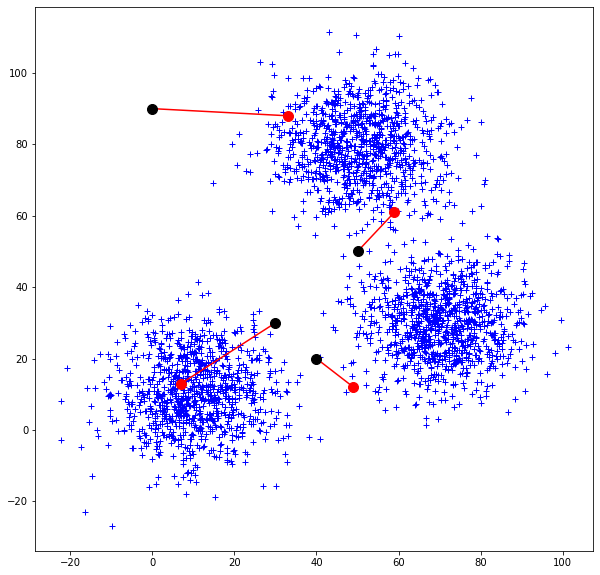

In [37]:
figsize(10,10)
plot(data[:,0], data[:,1], 'b+')
harray = array(history)
for i in range(len(protos)):
    plot(harray[:,i,0], harray[:,i,1],'r')
plot(harray[0,:,0], harray[0,:,1], 'ko', markersize = 10)
plot(protos[:,0], protos[:,1], 'ro', markersize = 10)

In [38]:
for round_ in range(1000):
    if round_%100==0: sys.stderr.write("%d "%round_)
    dists = cdist(protos,data)
    closest = argmin(dists,axis=0)
    for i in range(len(protos)):
        protos[i,:] = average(data[closest==i], axis=0)
    history.append(protos.copy())
        
 

0 100 200 300 400 500 600 700 800 900 

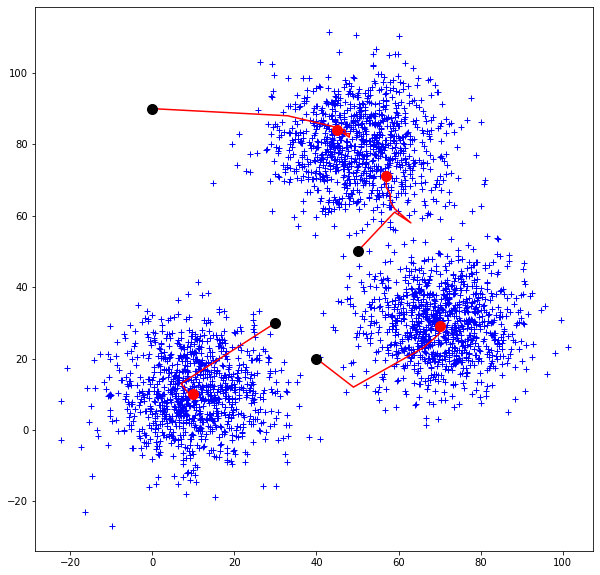

In [43]:
figsize(10,10)
plot(data[:,0],data[:,1],'b+')
history = array(history)
for i in range(len(protos)):
    plot(history[:,i,0], history[:,i,1], 'r')
plot(history[0,:,0],history[0,:,1],'ko',markersize=10)
plot(protos[:,0],protos[:,1],'ro',markersize=10)

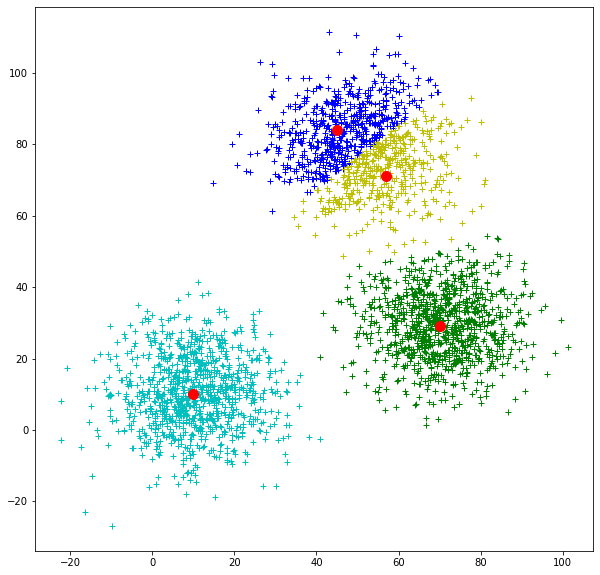

In [45]:
figsize(10,10)
dists = cdist(protos,data)
closest = argmin(dists,axis=0)
for i in range(len(protos)):
  plot(data[closest==i,0],data[closest==i,1],['c+','g+','b+','y+'][i])
plot(protos[:,0],protos[:,1],'ro',markersize=10)

In [47]:
df = pd.read_csv('https://raw.githubusercontent.com/sharmaroshan/Clustering-of-Mall-Customers/master/Mall_Customers.csv')

In [48]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [52]:
X = df.iloc[:, 3:]

In [53]:
X

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [54]:
from sklearn.cluster import KMeans

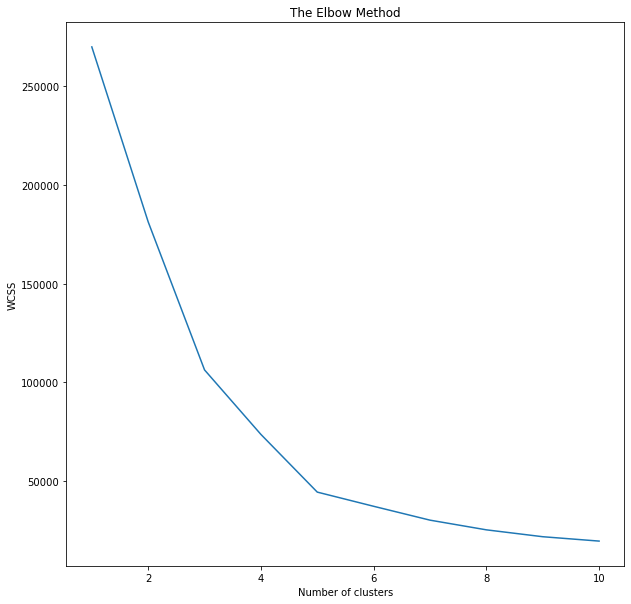

In [55]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [56]:

kmeans = KMeans(n_clusters=5,random_state=42)

In [59]:
y_kmeans = kmeans.fit_predict(X)
print(y_kmeans)

[3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3
 0 3 0 3 0 3 1 3 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 4 2 1 2 4 2 4 2 1 2 4 2 4 2 4 2 4 2 1 2 4 2 4 2
 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2]


In [64]:
test = kmeans.predict(np.asarray([[3,3]]))

In [66]:
test[0]

3

In [67]:
import pickle 
 
filename = 'finalised_kmeans_model.sav'

with open(filename, 'wb') as f:
    pickle.dump(kmeans, f)

In [75]:
X[y_kmeans==0]

,Annual Income (k$),Spending Score (1-100)
1,15,81
3,16,77
5,17,76
7,18,94
9,19,72
11,19,99
13,20,77
15,20,79
17,21,66
19,23,98


In [72]:
y_kmeans

array([3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 1,
       3, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 4, 2, 1, 2, 4, 2, 4, 2,
       1, 2, 4, 2, 4, 2, 4, 2, 4, 2, 1, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2])

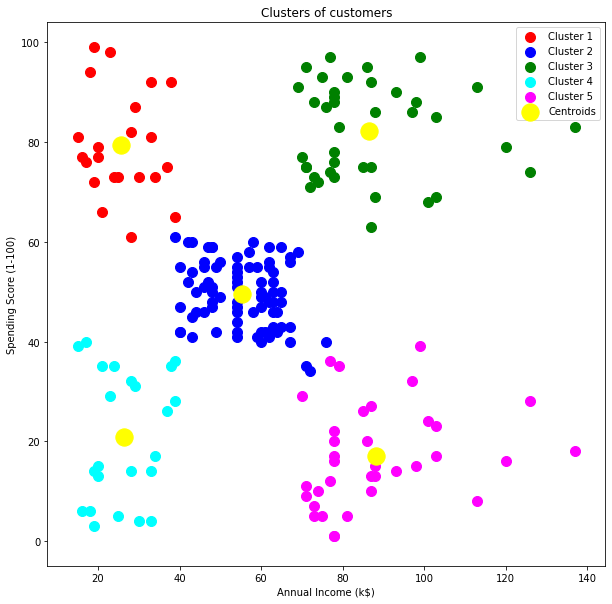

In [82]:
plt.scatter(X[y_kmeans==0]['Annual Income (k$)'], X[y_kmeans==0]['Spending Score (1-100)'], s = 100, c= 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans==1]['Annual Income (k$)'], X[y_kmeans==1]['Spending Score (1-100)'], s = 100, c= 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans==2]['Annual Income (k$)'], X[y_kmeans==2]['Spending Score (1-100)'], s = 100, c= 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans==3]['Annual Income (k$)'], X[y_kmeans==3]['Spending Score (1-100)'], s = 100, c= 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans==4]['Annual Income (k$)'], X[y_kmeans==4]['Spending Score (1-100)'], s = 100, c= 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], s = 300,c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [83]:
good_init = np.array([[-3, 3], [-3, 2], [-3, 1], [-1, 2], [0, 2]])
kmeans = KMeans(n_clusters=5, init=good_init, n_init=1)

In [84]:
from sklearn.cluster import MiniBatchKMeans
minibatch_kmeans = MiniBatchKMeans(n_clusters=5)
minibatch_kmeans.fit(X)

MiniBatchKMeans(batch_size=100, compute_labels=True, init='k-means++',
                init_size=None, max_iter=100, max_no_improvement=10,
                n_clusters=5, n_init=3, random_state=None,
                reassignment_ratio=0.01, tol=0.0, verbose=0)

In [85]:
import random as pyrandom


In [88]:
figsize(6,6)
ccolors = ['go', 'ro','bo','mo','co','yo']
def plot_clusters(data, centers = None):
    xlim([0,100]); ylim([0,100])
    if centers is None:
        plot(data[:,0], data[:,1], 'bo', markersize = 5)
    else:
        for i in range(amax(centers)+1):
            plot(data[centers==i,0], data[centers==i,1], ccolors[i%len(ccolors)], markersize =5)

In [89]:
data = r_[4*randn(10,2)+array([70,50]),
          4*randn(10,2)+array([30,50])]

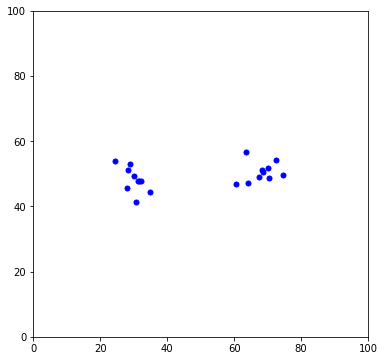

In [90]:
plot_clusters(data)

In [91]:
ds = cdist(data,data)

In [93]:
from scipy.cluster.hierarchy import *

In [94]:
lm = linkage(ds,'single')
lm[:5]

C:\Users\skme2\AppData\Local\Temp\ipykernel_22080\7369630.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  lm = linkage(ds,'single')


array([[11.        , 19.        ,  1.22204499,  2.        ],
       [ 2.        ,  8.        ,  2.0386653 ,  2.        ],
       [12.        , 20.        ,  2.22716967,  3.        ],
       [10.        , 13.        ,  5.11558537,  2.        ],
       [ 0.        , 21.        ,  6.09658644,  3.        ]])

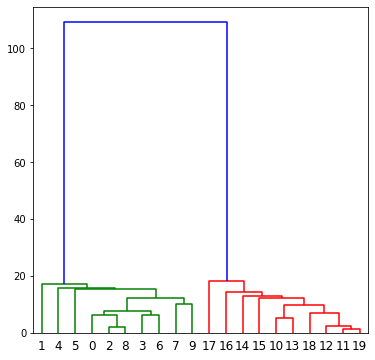

In [96]:
_ = dendrogram(lm)

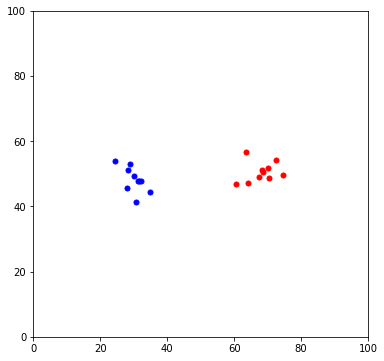

In [98]:
plot_clusters(data, fcluster(lm,2,criterion='maxclust'))

In [99]:
data = r_[dot(randn(100,2),diag([4,10]))+array([60,60]),
           dot(randn(100,2),diag([4,10]))+array([40,40])]

In [100]:
shuffle(data)

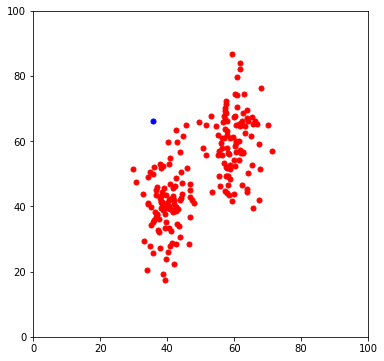

In [103]:
assignment = fclusterdata(data,2,criterion='maxclust', metric='euclidean',method='single')
plot_clusters(data,assignment)

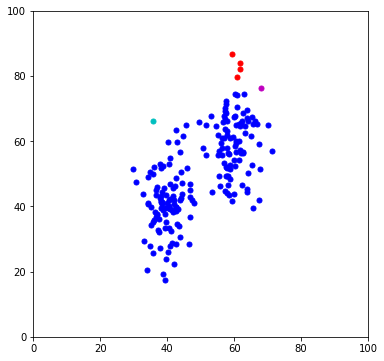

In [104]:
assignment = fclusterdata(data,4,criterion='maxclust', metric='euclidean',method='single')
plot_clusters(data,assignment)

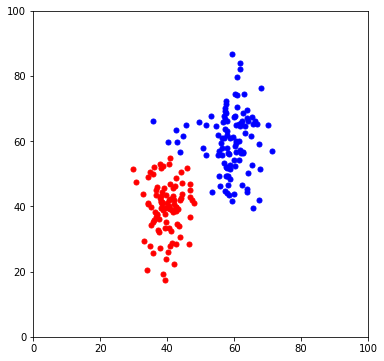

In [109]:
assignment = fclusterdata(data,2,metric='euclidean',method='complete',criterion='maxclust')
plot_clusters(data,assignment)

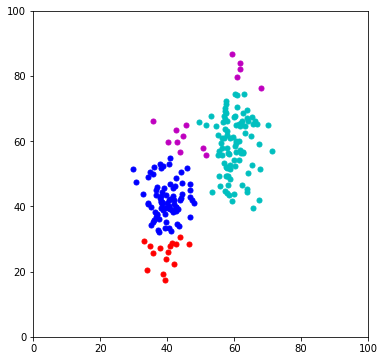

In [110]:
assignment = fclusterdata(data,4,metric='euclidean',method='complete',criterion='maxclust')
plot_clusters(data,assignment)

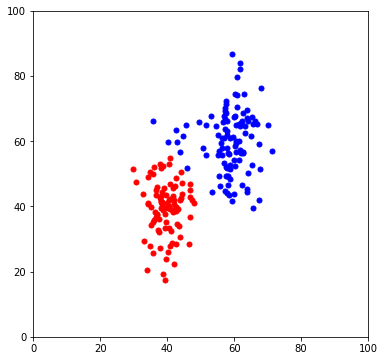

In [111]:
assignment = fclusterdata(data,2,metric='euclidean',method='average',criterion='maxclust')
plot_clusters(data,assignment)

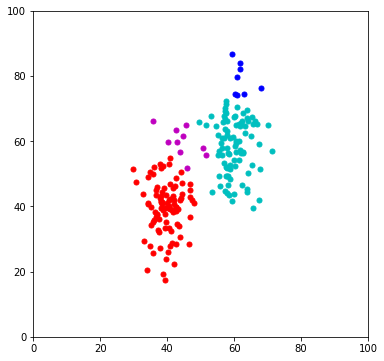

In [112]:
assignment = fclusterdata(data,4,metric='euclidean',method='average',criterion='maxclust')
plot_clusters(data,assignment)

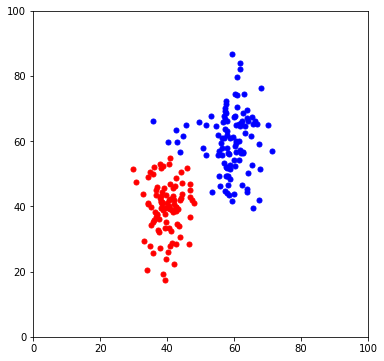

In [115]:
lm = linkage(data, metric='euclidean', method = 'centroid')
assignment = fcluster(lm,2,criterion='maxclust')
plot_clusters(data,assignment)

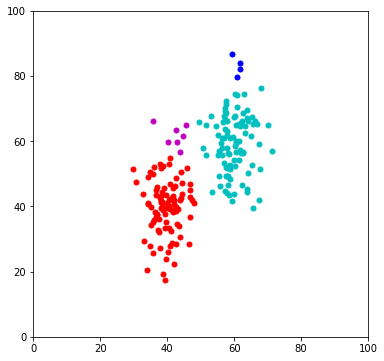

In [116]:
lm = linkage(data, metric='euclidean', method = 'centroid')
assignment = fcluster(lm,4,criterion='maxclust')
plot_clusters(data,assignment)

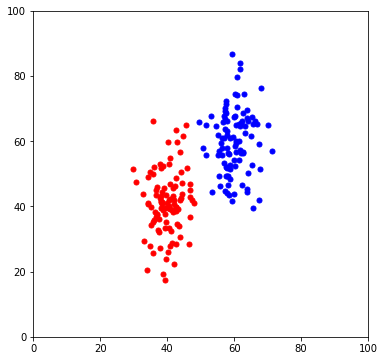

In [118]:
lm = linkage(data, metric='euclidean', method = 'ward')
assignment = fcluster(lm,2,criterion='maxclust')
plot_clusters(data,assignment)

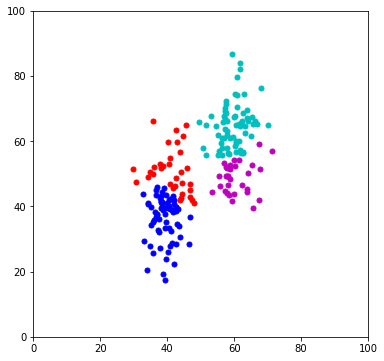

In [119]:
lm = linkage(data, metric='euclidean', method = 'ward')
assignment = fcluster(lm,4,criterion='maxclust')
plot_clusters(data,assignment)

In [121]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler


In [123]:
centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(n_samples=750,centers=centers,cluster_std=0.4,random_state=0)

In [125]:
X_scaled = StandardScaler().fit_transform(X)

In [126]:
db = DBSCAN(eps=0.3, min_samples=10).fit(X_scaled)

In [131]:
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

In [132]:
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

In [135]:
n_noise_ = list(labels).count(-1)

In [136]:
% n_clusters_

UsageError: Line magic function `%` not found.


In [137]:
n_clusters_

3

In [138]:
n_noise_

18

In [139]:
metrics.homogeneity_score(labels_true,labels)

0.9530024020741487

In [140]:
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

"""Homogeneity metric of a cluster labeling given a ground truth.

A clustering result satisfies homogeneity if all of its clusters
contain only data points which are members of a single class."""

print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))

Estimated number of clusters: 3
Estimated number of noise points: 18
Homogeneity: 0.953


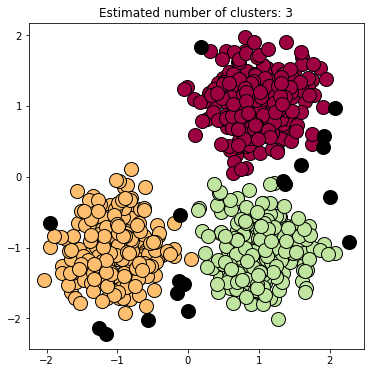

In [143]:
import matplotlib.pyplot as plt

unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0,1, len(unique_labels))]


for k, col in zip(unique_labels,colors):
    if k==-1:
        col = [0,0,0,1]
    class_member_mask= (labels==k)
    xy = X[class_member_mask & core_samples_mask]
    
    plt.plot(xy[:,0], xy[:,1], 'o', markerfacecolor = tuple(col), markersize = 14,markeredgecolor= 'k')
    
    xy = X[class_member_mask & ~core_samples_mask]
    
    plt.plot(xy[:,0], xy[:,1], 'o', markerfacecolor = tuple(col), markeredgecolor = 'k', markersize = 14)
    
plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

In [144]:
print("Rand Index: %0.3f" % metrics.adjusted_rand_score(labels_true,labels))

Rand Index: 0.952


In [145]:
metrics.jaccard_similarity_score(labels_true,labels)

C:\Users\skme2\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:656: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  warnings.warn('jaccard_similarity_score has been deprecated and replaced '


0.972

In [147]:
def purity_score(y_true, y_pred):
    contingency_matrix = metrics.cluster.contingency_matrix(y_true,y_pred)
    return np.sum(np.amax(contingency_matrix, axis=0))/np.sum(contingency_matrix)

In [148]:
purity_score(labels_true,labels)

0.9813333333333333